In [1]:
import pandas as pd
from fbprophet import Prophet
import datetime


Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('raw_files/sale_prices_state.csv')
df.head()

,Date,CA,TX,NY,FL,IL,PA,OH,MI,GA,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
0,1/31/1996,162238,97631,139108,100595,139112,96300,92098,90643,102841,...,106348,126677,NaN,131960,84389,125190,NaN,108750,166900,NaN
1,2/29/1996,162008,97656,138793,100691,138861,96233,92209,90966,103000,...,106046,126771,NaN,131905,84783,125611,NaN,108738,166140,NaN
2,3/31/1996,161859,97684,138607,100803,138544,96166,92355,91276,103162,...,105841,126766,NaN,131845,84745,125886,NaN,108650,165469,NaN
3,4/30/1996,161569,97811,138327,101013,138172,96057,92659,91942,103513,...,105510,126770,NaN,131703,84802,126559,NaN,108515,164321,NaN
4,5/31/1996,161373,97948,138224,101215,137661,95958,92975,92599,103865,...,105492,126606,NaN,131818,84595,127077,NaN,108331,163420,NaN


In [3]:
df = df.rename(columns = {'Date':'ds', 'PA':'y'})
df.head()

,ds,CA,TX,NY,FL,IL,y,OH,MI,GA,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
0,1/31/1996,162238,97631,139108,100595,139112,96300,92098,90643,102841,...,106348,126677,NaN,131960,84389,125190,NaN,108750,166900,NaN
1,2/29/1996,162008,97656,138793,100691,138861,96233,92209,90966,103000,...,106046,126771,NaN,131905,84783,125611,NaN,108738,166140,NaN
2,3/31/1996,161859,97684,138607,100803,138544,96166,92355,91276,103162,...,105841,126766,NaN,131845,84745,125886,NaN,108650,165469,NaN
3,4/30/1996,161569,97811,138327,101013,138172,96057,92659,91942,103513,...,105510,126770,NaN,131703,84802,126559,NaN,108515,164321,NaN
4,5/31/1996,161373,97948,138224,101215,137661,95958,92975,92599,103865,...,105492,126606,NaN,131818,84595,127077,NaN,108331,163420,NaN


In [4]:
df.dtypes

ds     object
CA      int64
TX      int64
NY      int64
FL      int64
IL      int64
y       int64
OH      int64
MI      int64
GA      int64
NC      int64
NJ      int64
VA      int64
WA      int64
MA      int64
IN      int64
AZ      int64
TN      int64
MO      int64
MD      int64
WI      int64
MN      int64
CO      int64
AL      int64
SC      int64
LA      int64
KY      int64
OR      int64
OK      int64
CT      int64
IA      int64
MS      int64
AR      int64
KS      int64
UT      int64
NV      int64
NM    float64
WV      int64
NE      int64
ID      int64
HI      int64
ME      int64
NH      int64
RI      int64
MT    float64
DE      int64
SD      int64
AK      int64
ND    float64
VT      int64
DC      int64
WY    float64
dtype: object

In [5]:
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df.head()

,ds,CA,TX,NY,FL,IL,y,OH,MI,GA,...,NH,RI,MT,DE,SD,AK,ND,VT,DC,WY
0,1996-01-31,162238,97631,139108,100595,139112,96300,92098,90643,102841,...,106348,126677,NaN,131960,84389,125190,NaN,108750,166900,NaN
1,1996-02-29,162008,97656,138793,100691,138861,96233,92209,90966,103000,...,106046,126771,NaN,131905,84783,125611,NaN,108738,166140,NaN
2,1996-03-31,161859,97684,138607,100803,138544,96166,92355,91276,103162,...,105841,126766,NaN,131845,84745,125886,NaN,108650,165469,NaN
3,1996-04-30,161569,97811,138327,101013,138172,96057,92659,91942,103513,...,105510,126770,NaN,131703,84802,126559,NaN,108515,164321,NaN
4,1996-05-31,161373,97948,138224,101215,137661,95958,92975,92599,103865,...,105492,126606,NaN,131818,84595,127077,NaN,108331,163420,NaN


In [6]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
651,2021-03-27
652,2021-03-28
653,2021-03-29
654,2021-03-30
655,2021-03-31


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
651,2021-03-27,204212.734317,201884.384656,206163.842662
652,2021-03-28,204272.624714,201872.919248,206568.974432
653,2021-03-29,204388.682090,202132.136154,206627.722591
654,2021-03-30,204558.185686,202151.789936,206732.106207
655,2021-03-31,204776.892428,202394.050703,206969.858556


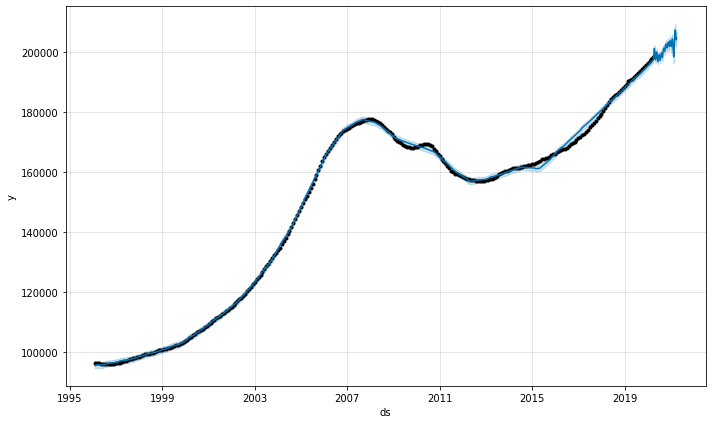

In [9]:
fig1 = m.plot(forecast)

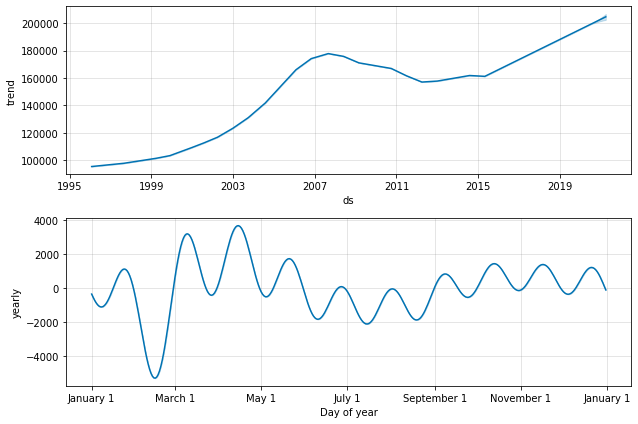

In [10]:
fig2 = m.plot_components(forecast)


In [63]:
#did not do this step yet since not sure it's necessary to have interactive graph per our convo with Manny
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

ModuleNotFoundError: No module named 'plotly'

In [11]:
import pickle
pkl_path = "PA.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)

# save the dataframe
forecast.to_pickle("PA.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [12]:
forecast.to_csv("PA.csv")

In [ ]:
#Top Populated States
# California (Population: 39,747,267)
# Texas (Population: 29,087,070)
# Florida (Population: 21,646,155)
# New York (Population: 19,491,339)
# Pennsylvania (Population: 12,813,969)
#https://worldpopulationreview.com/states

In [ ]:
#Bottom Populated States
# Wyoming (Population: 572,381)
# Vermont (Population: 627,180)
# District of Columbia (Population: 711,571)
# Alaska (Population: 735,720)
# North Dakota (Population: 760,900)